<a href="https://colab.research.google.com/github/knc6/jarvis-tools-notebooks/blob/master/jarvis-tools-notebooks/Analyzing_MOF_datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install jarvis-tools

     |████████████████████████████████| 945 kB 5.0 MB/s 
     |████████████████████████████████| 296 kB 17.6 MB/s 


### We have prepared a basic json file with meta-data associated with JARVIS-DFT. So, first let's import jarvis-dft metadata from the figshre repository. This has been built as a module in the jarvis-tools


In [2]:
# !pip install jarvis-tools, and restart runtime in the notebook if you haven't installed it yet
from jarvis.db.figshare import data

qmof = data('qmof')


Obtaining QMOF dataset 18k...
Reference:https://www.cell.com/matter/fulltext/S2590-2385(21)00070-9


100%|██████████| 55.0M/55.0M [00:03<00:00, 17.4MiB/s]


Loading the zipfile...
Loading completed.


In [3]:
# data-size
print (len(qmof))

18321


In [4]:
# let's make a pandas dataframe from the figshare json file
# pip install pandas, if you haven't installed yet
import pandas as pd
import numpy as np

df=pd.DataFrame(qmof)

In [5]:
# Keys in the json file
print (df.columns, len(df.columns))

Index(['id', 'formula', 'atoms', 'energy_total', 'bandgap', 'net_magmom'], dtype='object') 6


In [14]:
df

,id,formula,atoms,energy_total,bandgap,net_magmom,natoms
0,ABACUF01_FSR,Ba2CuC6H14O16,"{'lattice_mat': [[-6.573085952, -0.028973028, ...",-238.661235,0.635073,1.0,39
1,ABAFUH_FSR,Cu8C36H32O16,"{'lattice_mat': [[5.143733494, -2.2707e-05, 1....",-582.016017,2.193039,0.0,92
2,ABALOF_FSR,Cu12C36H56I16N4S4,"{'lattice_mat': [[11.015890151, 0.0, 0.0], [-3...",-672.046744,1.134232,0.0,128
3,ABAVIJ_FSR,Co4C48H32N8O16,"{'lattice_mat': [[-9.249964728, 0.10854619, -3...",-759.996078,0.345448,12.0,108
4,ABAVOP_FSR,Co4C48H32N8O16,"{'lattice_mat': [[9.806075328, 0.108025938, 8....",-760.103362,0.342645,12.0,108
...,...,...,...,...,...,...,...
18316,tobacco_SR_tty_v1-8c_Zr_1_Ch_v2-3c_B_Ch_1TrU_C...,Zr6C60H36O32,"{'lattice_mat': [[17.424748865, 0.103625238, -...",-978.669918,2.887535,0.0,134
18317,tobacco_SR_tty_v1-8c_Zr_1_Ch_v2-3c_B_Ch_1TrU_C...,Zr6C52H28O32,"{'lattice_mat': [[16.68685381, -0.016831733, 0...",-871.932805,2.842611,0.0,118
18318,tobacco_SR_tty_v1-8c_Zr_1_Ch_v2-3c_triazine_Ch...,Zr6C48H24N12O32,"{'lattice_mat': [[17.26969674, 0.059300552, 0....",-919.925822,2.678185,0.0,122
18319,tobacco_SR_tty_v1-8c_Zr_1_Ch_v2-3c_triazine_Ch...,Zr6C40H16N12O32,"{'lattice_mat': [[16.488412655, -0.025688541, ...",-813.961030,2.636262,0.0,106


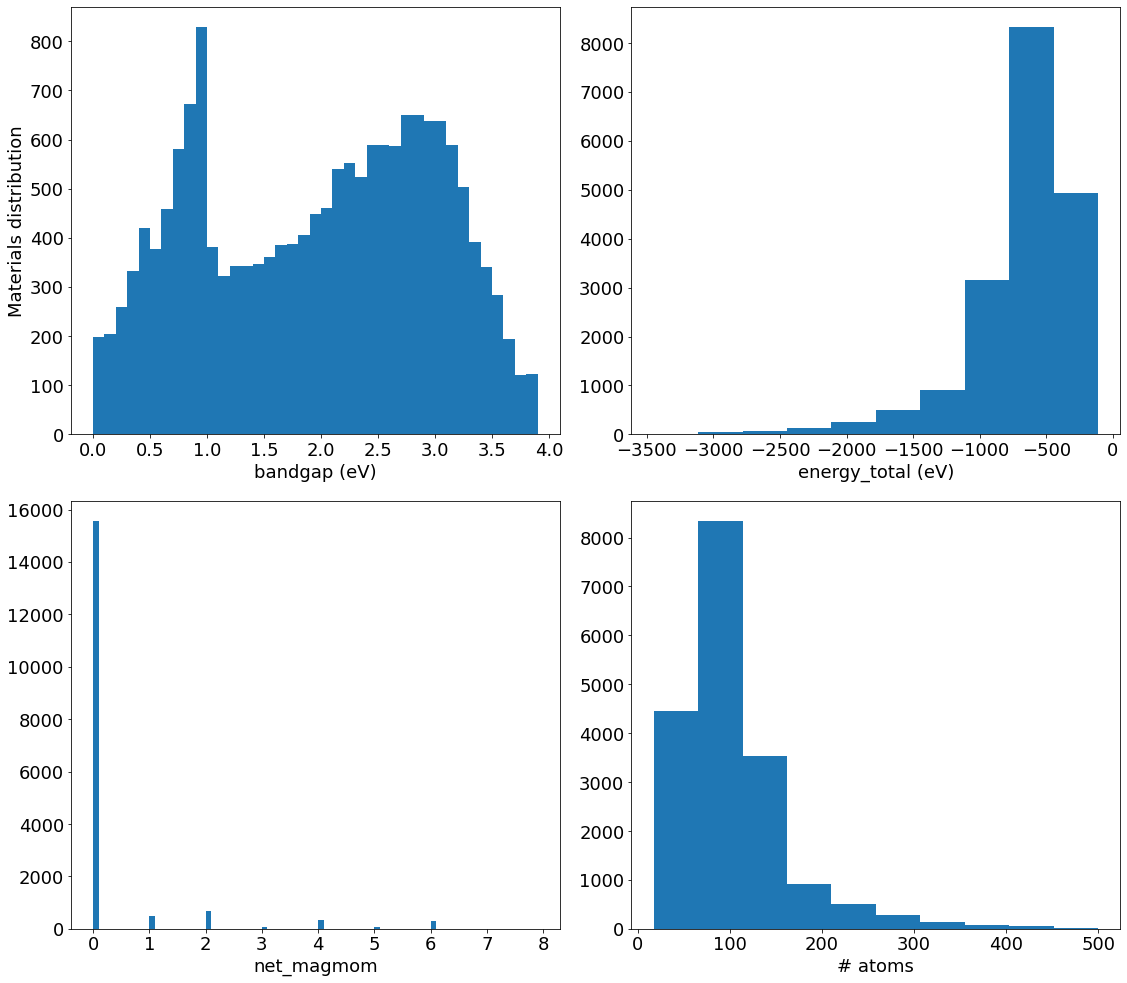

In [6]:
# Now let's make a histogram for some of the material-properties in the dataset
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from jarvis.core.atoms import Atoms

the_grid = GridSpec(2, 2)
plt.rcParams.update({'font.size': 18})
plt.figure(figsize=(16,14))

plt.subplot(the_grid[0,0])
val=np.array(df['bandgap'].replace('na',np.nan).dropna().values,dtype='float')
plt.hist(val,bins=np.arange(0,4,.1))
plt.xlabel('bandgap (eV)')
plt.ylabel('Materials distribution')

plt.subplot(the_grid[0,1])
val=np.array(df['energy_total'].replace('na',np.nan).dropna().values,dtype='float')
plt.hist(val)#,bins=np.arange(0,8,.1))
plt.xlabel('energy_total (eV)')
#plt.ylabel('Materials distribution')

plt.subplot(the_grid[1,0])
val=np.array(df['net_magmom'].replace('na',np.nan).dropna().values,dtype='float')
plt.hist(val,bins=np.arange(0,8,.1))
plt.xlabel('net_magmom')
#plt.ylabel('Materials distribution')

df['natoms'] = df['atoms'].apply(lambda x: Atoms.from_dict(x).num_atoms)
plt.subplot(the_grid[1,1])
val=np.array(df['natoms'].replace('na',np.nan).dropna().values,dtype='float')
plt.hist(val)#,bins=np.arange(0,8,.1))
plt.xlabel('# atoms')

plt.tight_layout()

In [8]:
hmof = data('hmof')

Obtaining QMOF dataset 137k...
Reference:https://doi.org/10.1021/acs.jpcc.6b08729


100%|██████████| 383M/383M [00:17<00:00, 22.3MiB/s]


Loading the zipfile...
Loading completed.


In [9]:
# data-size
print (len(hmof))

137652


In [10]:
df2=pd.DataFrame(hmof)

In [12]:
df2.columns

Index(['id', 'atoms', 'max_co2_adsp', 'lcd', 'pld', 'void_fraction',
       'surface_area_m2g', 'surface_area_m2cm3'],
      dtype='object')

pld: pore limiting diameter

lcd: largest cavity diameter

In [13]:
df2

,id,atoms,max_co2_adsp,lcd,pld,void_fraction,surface_area_m2g,surface_area_m2cm3
0,18812,"{'lattice_mat': [[19.077068000000008, 0.0, 0.0...",2.87034,20.75,19.25,0.891661,5173.4,1444.8
1,31716,"{'lattice_mat': [[15.296720000000002, 0.0, 0.0...",4.18618,11.25,10.25,0.805618,3670.2,2064.6
2,46755,"{'lattice_mat': [[7.088929000000002, 0.0, 0.0]...",3.87465,4.75,4.25,0.397519,670.7,892.1
3,84828,"{'lattice_mat': [[14.206616526257514, 0.0, 0.0...",11.21440,9.25,5.25,0.706061,3087.3,2377.3
4,50576,"{'lattice_mat': [[12.030359959451998, 0.0, 0.0...",7.99082,5.25,4.25,0.637972,2049.2,1996.1
...,...,...,...,...,...,...,...,...
137647,90033,"{'lattice_mat': [[25.63923300000001, 0.0, 0.0]...",3.65133,23.25,21.75,0.914021,5419.3,1214.8
137648,102380,"{'lattice_mat': [[9.798715000000005, 0.0, 0.0]...",2.91239,5.25,3.25,0.280042,263.0,328.2
137649,68985,"{'lattice_mat': [[13.472589423506017, 0.0, 0.0...",6.19079,6.75,4.75,0.676428,3578.2,2611.0
137650,110732,"{'lattice_mat': [[14.85435208467515, 0.0, 0.0]...",6.21306,6.75,4.75,0.682455,3852.3,2646.7


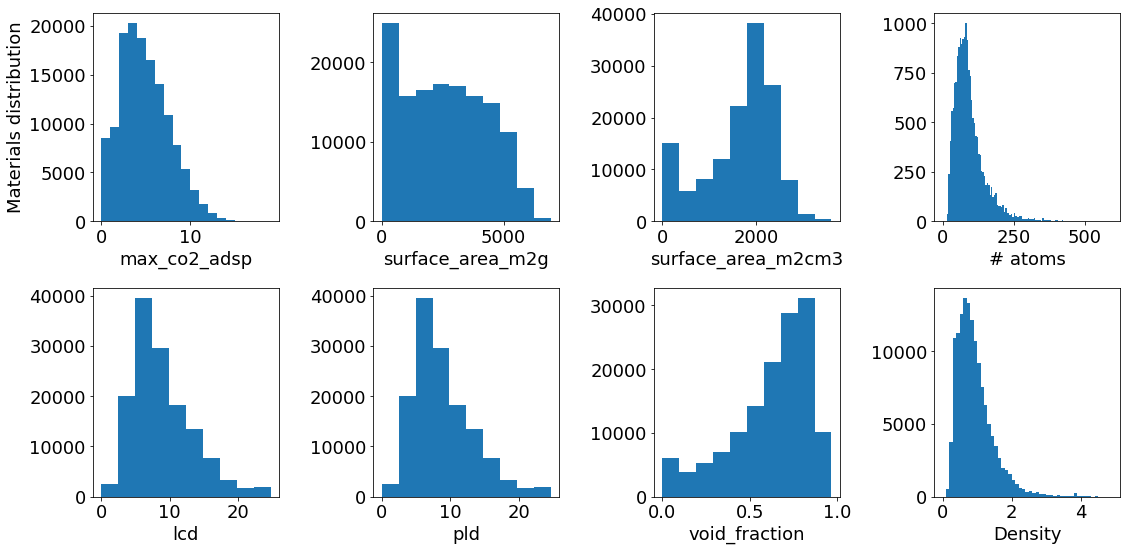

In [21]:
# Now let's make a histogram for some of the material-properties in the dataset
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from jarvis.core.atoms import Atoms

the_grid = GridSpec(2, 4)
plt.rcParams.update({'font.size': 18})
plt.figure(figsize=(16,8))

plt.subplot(the_grid[0,0])
val=np.array(df2['max_co2_adsp'].replace('na',np.nan).dropna().values,dtype='float')
plt.hist(val,bins=np.arange(0,20,1))
plt.xlabel('max_co2_adsp')
plt.ylabel('Materials distribution')

plt.subplot(the_grid[0,1])
val=np.array(df2['surface_area_m2g'].replace('na',np.nan).dropna().values,dtype='float')
plt.hist(val)#,bins=np.arange(0,8,.1))
plt.xlabel('surface_area_m2g')
#plt.ylabel('Materials distribution')

plt.subplot(the_grid[0,2])
val=np.array(df2['surface_area_m2cm3'].replace('na',np.nan).dropna().values,dtype='float')
plt.hist(val)#,bins=np.arange(0,8,.1))
plt.xlabel('surface_area_m2cm3')

#plt.ylabel('Materials distribution')

df['natoms'] = df2['atoms'].apply(lambda x: Atoms.from_dict(x).num_atoms)
plt.subplot(the_grid[0,3])
val=np.array(df['natoms'].replace('na',np.nan).dropna().values,dtype='float')
plt.hist(val,bins=np.arange(0,600,5))
plt.xlabel('# atoms')


plt.subplot(the_grid[1,0])
val=np.array(df2['lcd'].replace('na',np.nan).dropna().values,dtype='float')
plt.hist(val)#,bins=np.arange(0,8,.1))
plt.xlabel('lcd')


plt.subplot(the_grid[1,1])
val=np.array(df2['lcd'].replace('na',np.nan).dropna().values,dtype='float')
plt.hist(val)#,bins=np.arange(0,8,.1))
plt.xlabel('pld')


plt.subplot(the_grid[1,2])
val=np.array(df2['void_fraction'].replace('na',np.nan).dropna().values,dtype='float')
plt.hist(val)#,bins=np.arange(0,8,.1))
plt.xlabel('void_fraction')


df2['density'] = df2['atoms'].apply(lambda x: Atoms.from_dict(x).density)
plt.subplot(the_grid[1,3])
val=np.array(df2['density'].replace('na',np.nan).dropna().values,dtype='float')
plt.hist(val,bins=np.arange(0,5,.1))
plt.xlabel('Density')

plt.tight_layout()